### Imports

In [1]:
#ABODJI Kondi Kalèd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
%matplotlib inline


In [2]:
#loading data from yahoo finance
STOCKNAME = "GC=F" #GC=F is the gold name
data = yf.download(STOCKNAME, auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


### Data Exploration

In [4]:
#Data exploration
data.head()

Open        High         Low       Close  Volume
Date                                                              
2000-08-30  273.899994  273.899994  273.899994  273.899994       0
2000-08-31  274.799988  278.299988  274.799988  278.299988       0
2000-09-01  277.000000  277.000000  277.000000  277.000000       0
2000-09-05  275.799988  275.799988  275.799988  275.799988       2
2000-09-06  274.200012  274.200012  274.200012  274.200012       0

In [5]:
data.shape

(5801, 5)

In [6]:
data.describe()

Open         High          Low        Close         Volume
count  5801.000000  5801.000000  5801.000000  5801.000000    5801.000000
mean   1100.074608  1105.542390  1094.282417  1099.981831    4281.127047
std     526.188567   529.122295   523.057828   526.129244   24392.887312
min     255.000000   256.100006   255.000000   255.100006       0.000000
25%     606.000000   608.900024   606.900024   606.799988      20.000000
50%    1216.199951  1222.699951  1210.300049  1217.500000     104.000000
75%    1508.400024  1514.900024  1498.699951  1507.300049     393.000000
max    2053.600098  2072.000000  2040.000000  2051.500000  386334.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5801 entries, 2000-08-30 to 2023-10-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5801 non-null   float64
 1   High    5801 non-null   float64
 2   Low     5801 non-null   float64
 3   Close   5801 non-null   float64
 4   Volume  5801 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 271.9 KB


### Data splitting

In [8]:
X = data.drop("Close", axis=1)
Y = data["Close"]

### Stock close evolution 

<Axes: xlabel='Date'>

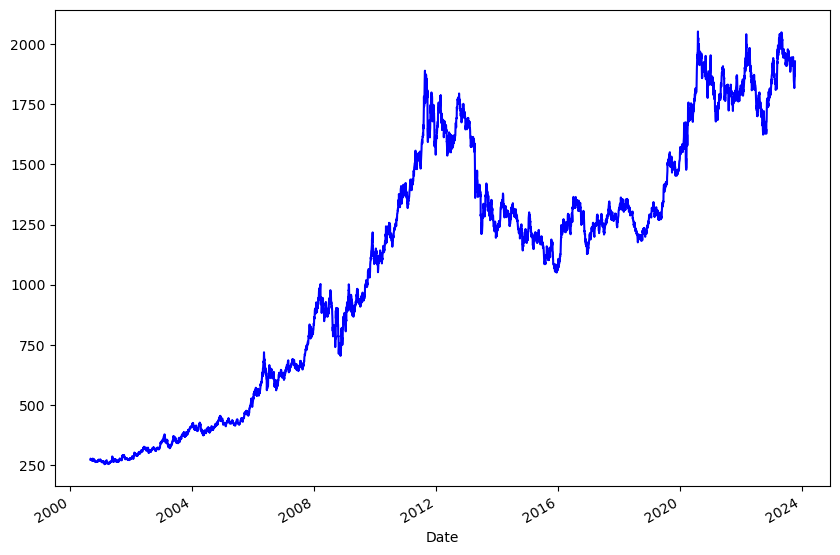

In [9]:
Y.plot(figsize=(10,7),color="b")

### Features repartition visualisation

/home/vastolordess/anaconda3/envs/stock-predictor-venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


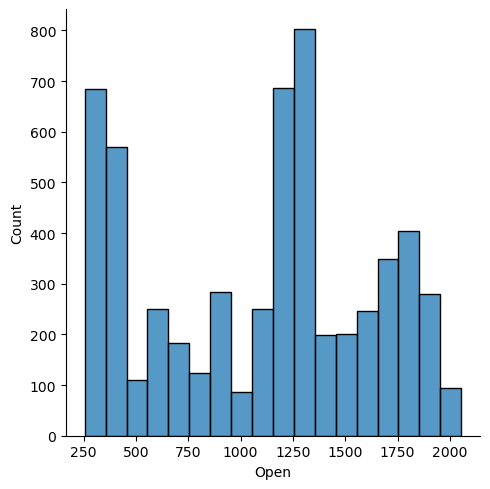

In [10]:
#open
sns.displot(data["Open"])

/home/vastolordess/anaconda3/envs/stock-predictor-venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


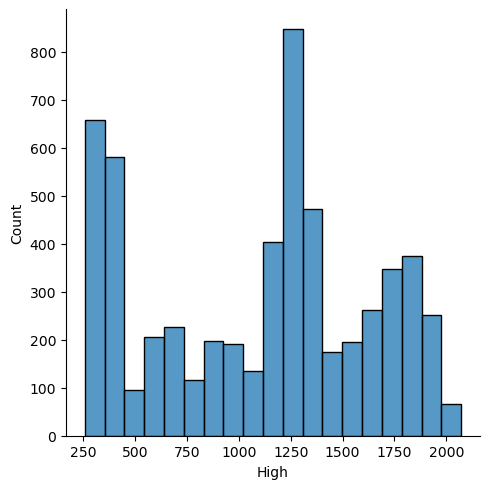

In [11]:
#High
sns.displot(data["High"])

/home/vastolordess/anaconda3/envs/stock-predictor-venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


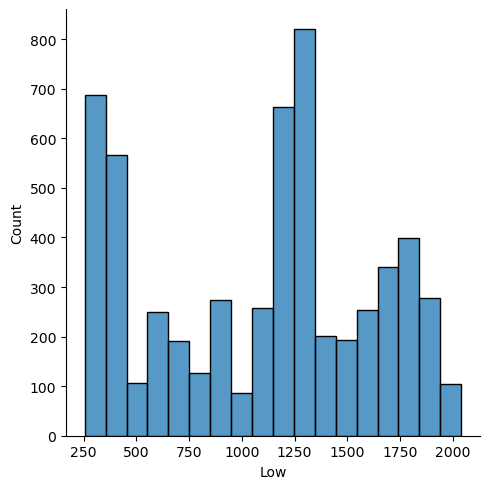

In [12]:
#Low
sns.displot(data["Low"])

### Splitting data

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4640, 4)
(1161, 4)
(4640,)
(1161,)


### Model and Train :  Simple Linear regression algorithm

In [14]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)


LinearRegression()

In [15]:
#prediction
prediction = model_lr.predict(X_test)
print(prediction)
print(prediction.shape)

[ 897.39486199 1313.98321932 1565.88950744 ... 1668.24512662 1323.78688246
 1065.65571475]
(1161,)


### Comparaison : Close-Prediction : Linear regression

                  Close   Prediction
Date                                
2008-01-11   896.099976   897.394862
2014-08-14  1313.900024  1313.983219
2012-05-25  1568.800049  1565.889507
2020-06-11  1732.000000  1729.406120
2019-05-28  1276.500000  1276.873107
...                 ...          ...
2010-10-29  1357.099976  1351.783789
2004-04-13   407.000000   408.679298
2013-01-03  1673.699951  1668.245127
2017-09-13  1323.400024  1323.786882
2015-12-18  1066.199951  1065.655715

[1161 rows x 2 columns]
Mean Absolute Error :- 2.8379236761673194


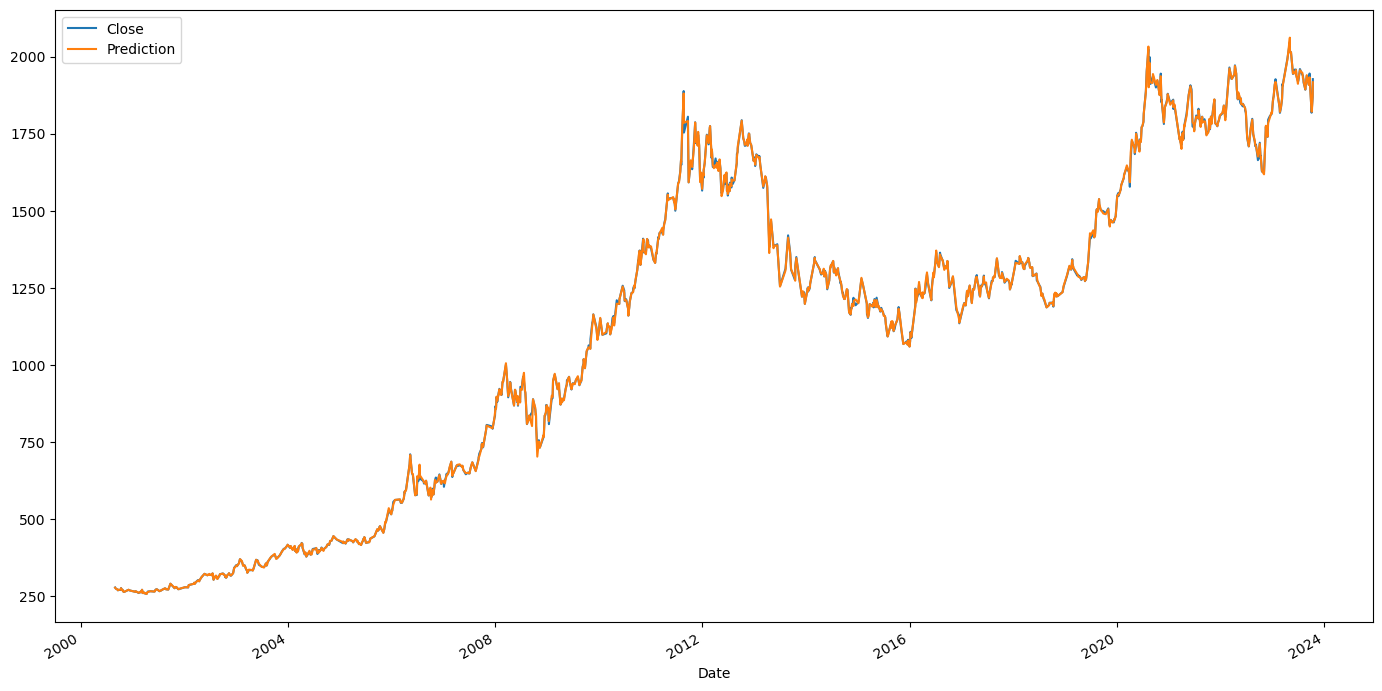

In [16]:
from sklearn.metrics import mean_absolute_error
comparaison_frame = pd.DataFrame(Y_test, columns=['Close'])
comparaison_frame["Prediction"]=prediction

print(comparaison_frame)
comparaison_frame.plot(figsize=(17,9))

print("Mean Absolute Error :- {}".format(mean_absolute_error(Y_test, prediction)))


### Ridge (Regularization L2)

In [17]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train, Y_train)

Ridge()

In [18]:
prediction_ridge = model_ridge.predict(X_test)

                  Close   prediction
Date                                
2008-01-11   896.099976   897.394829
2014-08-14  1313.900024  1313.983214
2012-05-25  1568.800049  1565.889477
2020-06-11  1732.000000  1729.406149
2019-05-28  1276.500000  1276.873113
...                 ...          ...
2010-10-29  1357.099976  1351.783734
2004-04-13   407.000000   408.679332
2013-01-03  1673.699951  1668.245198
2017-09-13  1323.400024  1323.786889
2015-12-18  1066.199951  1065.655659

[1161 rows x 2 columns]
Mean Absolute Error :- 2.8379270415350524


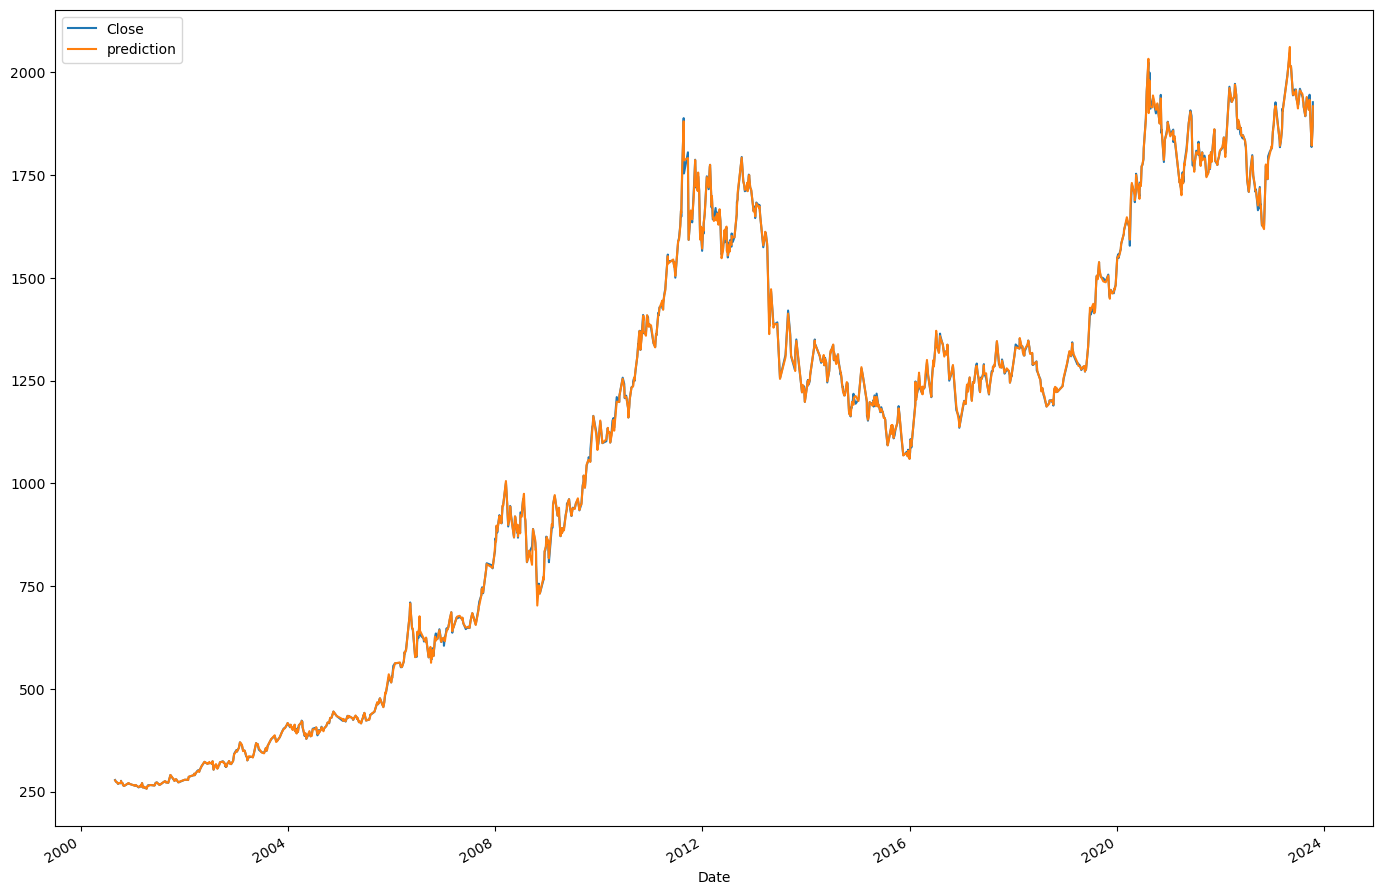

In [19]:
from sklearn.metrics import mean_absolute_error
ridge_comp_frame = pd.DataFrame(Y_test, columns=["Close"])
ridge_comp_frame["prediction"] = prediction_ridge
print(ridge_comp_frame)

#visualization
ridge_comp_frame.plot(figsize=(17,12))
print("Mean Absolute Error :- {}".format(mean_absolute_error(Y_test,prediction_ridge)))

### Multicollinearity : Pearson correlation coefficient

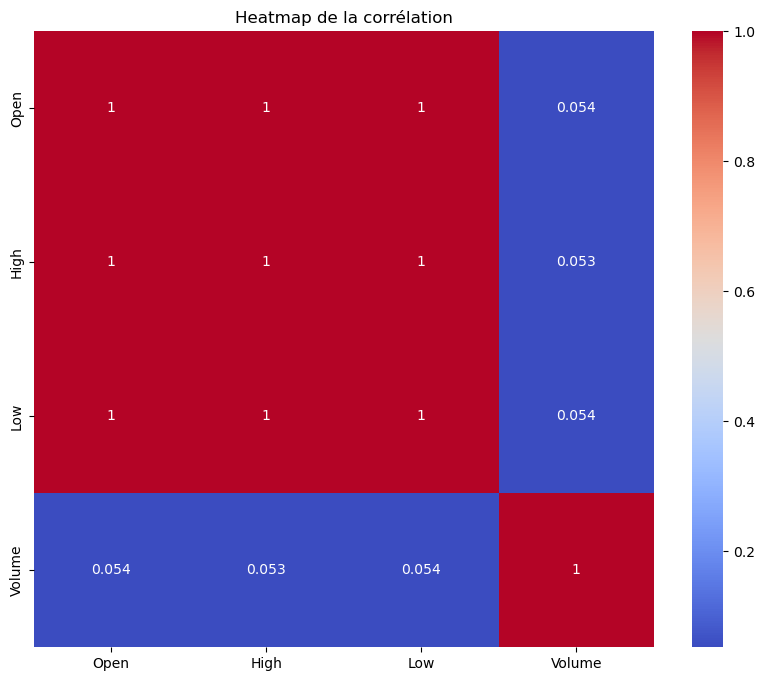

In [20]:
correlation_matrix = X.corr() #Pearson Correlation

plt.figure(figsize=(10, 8))  # Pour ajuster la taille de la figure (facultatif)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap de la corrélation")  # Titre de la heatmap (facultatif)
plt.show()

### Conclusion